In [37]:
# EDA/Visualização de dados
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# ML
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimização
import optuna

### Carga de dados

In [38]:
df_laptop = pd.read_csv('./datasets/dataset_laptops.csv')

In [39]:
df_laptop.info()

<class 'pandas.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    str    
 2   model                     991 non-null    str    
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    str    
 6   processor_tier            991 non-null    str    
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    str    
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    str    
 13  gpu_type                  991 non-null    str    
 14  is_touch_screen      

### EDA

In [40]:
df_laptop.head(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,851.41,45,apple,m1,8,8,8,SSD,256,apple,apple,False,13.3,2560,1600,mac,1
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,419.65,56,intel,core i5,4,8,16,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
7,8,asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...,599.55,70,intel,core i5,6,12,8,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
8,9,hp,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,443.64,60,intel,core i3,6,8,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
9,10,infinix,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,719.48,71,intel,core i9,14,20,32,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1


In [41]:
df_laptop.tail(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
981,993,msi,MSI Katana 15 B13VFK-296IN Gaming Laptop (13th...,1439.09,76,intel,core i7,10,16,16,SSD,1024,nvidia,dedicated,False,15.6,1920,1080,windows,2
982,994,asus,Asus Zenbook 14 OLED 2023 UM3402YA-KM551WS Lap...,935.36,68,amd,ryzen 5,6,12,16,SSD,1024,amd,integrated,False,14.0,2880,1800,windows,1
983,995,asus,Asus Vivobook 16 2023 M1605YA-MB551WS Laptop (...,803.44,65,amd,ryzen 5,6,12,16,SSD,1024,amd,integrated,False,16.0,1920,1200,windows,1
984,996,asus,Asus Vivobook 16 2023 M1605YA-MB541WS Laptop (...,719.48,64,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,16.0,1920,1200,windows,1
985,997,acer,Acer Nitro 5 AN515-47 NH.QL3SI.003 Gaming Lapt...,905.50,67,amd,ryzen 7,8,16,8,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,14.0,2560,1600,windows,1
990,1002,hp,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,251.74,37,intel,celeron,2,2,4,HDD,128,intel,integrated,False,15.6,1366,768,chrome,1


In [42]:
df_laptop.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000


In [43]:
# checar 'year_of_warranty'
df_laptop['year_of_warranty'].unique()

<StringArray>
['1', '2', 'No information', '3']
Length: 4, dtype: str

In [44]:
# ajustar "year_of_warranty"
df_laptop.loc[df_laptop['year_of_warranty'] == 'No information', 'year_of_warranty'] = '1'
df_laptop['year_of_warranty'] = df_laptop['year_of_warranty'].astype(int)

In [45]:
# ajustar 'is_touch_screen'
df_laptop['is_touch_screen'] = df_laptop['is_touch_screen'].astype(int)

In [46]:
# Distribuição de 'brand'
porcentagem_brand = df_laptop['brand'].value_counts() / len(df_laptop) * 100
px.bar(porcentagem_brand, color=porcentagem_brand.index)

In [47]:
# Distribuição de 'processor_brand'
porcentagem_processor_brand = df_laptop['processor_brand'].value_counts() / len(df_laptop) * 100
px.bar(porcentagem_processor_brand, color=porcentagem_processor_brand.index)

<Axes: xlabel='price', ylabel='Count'>

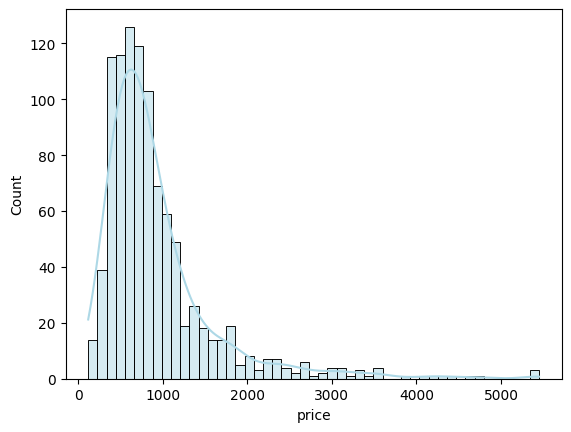

In [48]:
# Distribuição de 'price'
sns.histplot(df_laptop['price'], kde=True, color='lightblue')

<Axes: xlabel='rating', ylabel='Count'>

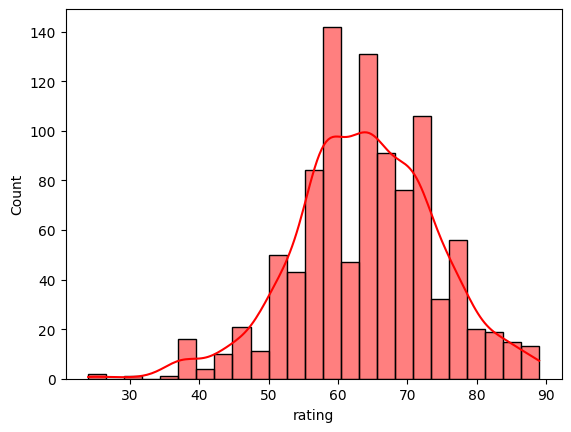

In [49]:
# Distribuição de 'rating'
sns.histplot(df_laptop['rating'], kde=True, color='red')

In [50]:
# Box-plot de distribuição entre 'brand' X 'price'
px.box(df_laptop, x='price', y='brand', color='brand', orientation='h')

In [51]:
# Box-plot de distribuição entre 'brand' X 'rating'
px.box(df_laptop, x='rating', y='brand', color='brand', orientation='h')

In [52]:
# Box-plot de distribuição entre 'price' X 'rating'
px.scatter(df_laptop, x='price', y='rating', color='brand')

### Treinamento Modelos de Clustering Hierarquico

In [53]:
# Copiar dataframe original para treinamento
X = df_laptop.copy()

In [54]:
# Remover variaveis desnecessárias
X.drop(columns=['index', 'model'], inplace=True)

In [55]:
# Separar variáveis numéricas de categóricas
numeric_features = ['price', 'rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity',
                     'display_size', 'resolution_width', 'resolution_height']
categorical_features = ['brand', 'processor_brand', 'processor_tier', 'primary_storage_type', 'gpu_brand', 'gpu_type', 'os']

In [56]:
# Definir transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [57]:
# Criar preprocessador de Transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [58]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [59]:
X_transformed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15856 stored elements and shape (991, 71)>

In [60]:
def hierarquical_aglomerative_objective(trial):
    # Definir Hiperparametros para serem ajustados
    n_clusters = trial.suggest_int('n_clusters', 50, 150)
    # Ranges para critérios de distancia para a separação de clusters
    linkage = trial.suggest_categorical('linkage', ['ward', 'complete'])

    # Instanciando o modelo
    hierarquical_model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)

    # Treinar o modelo e executar a clusterização
    y = hierarquical_model.fit_predict(X_transformed.toarray())

    # Calcular o Silhouette Score
    silhouette_avg = silhouette_score(X_transformed, y)

    return silhouette_avg

In [61]:
# Criar estudo do optuna
search_space_ag = {'n_clusters': range(50, 151), 'linkage': ['ward', 'complete']}
sampler_ag = optuna.samplers.GridSampler(search_space=search_space_ag)
estudo_ag = optuna.create_study(direction='maximize', sampler=sampler_ag)

[I 2026-02-13 16:59:58,192] A new study created in memory with name: no-name-b1d3a4f5-6615-4a81-b182-2bc21a997062


In [62]:
# Executar o estudo
estudo_ag.optimize(hierarquical_aglomerative_objective, n_trials=400)

[I 2026-02-13 16:59:58,238] Trial 0 finished with value: 0.2241309721892237 and parameters: {'n_clusters': 68, 'linkage': 'ward'}. Best is trial 0 with value: 0.2241309721892237.
[I 2026-02-13 16:59:58,268] Trial 1 finished with value: 0.2237035389159642 and parameters: {'n_clusters': 120, 'linkage': 'complete'}. Best is trial 0 with value: 0.2241309721892237.
[I 2026-02-13 16:59:58,300] Trial 2 finished with value: 0.17252467371533184 and parameters: {'n_clusters': 56, 'linkage': 'complete'}. Best is trial 0 with value: 0.2241309721892237.
[I 2026-02-13 16:59:58,332] Trial 3 finished with value: 0.28570622809904156 and parameters: {'n_clusters': 148, 'linkage': 'ward'}. Best is trial 3 with value: 0.28570622809904156.
[I 2026-02-13 16:59:58,365] Trial 4 finished with value: 0.22295344030613315 and parameters: {'n_clusters': 127, 'linkage': 'complete'}. Best is trial 3 with value: 0.28570622809904156.
[I 2026-02-13 16:59:58,398] Trial 5 finished with value: 0.22418567808388734 and para

In [63]:
# Melhor resultado para o modelo de aglomeração
best_params_ag = estudo_ag.best_params

print(f'Clusters = {best_params_ag['n_clusters']}')
print(f'Linkage = {best_params_ag['linkage']}')

Clusters = 150
Linkage = ward


In [64]:
def hierarquical_divisive_objective(trial):
    # Definir Hiperparametros para serem ajustados
    n_clusters = trial.suggest_int('n_clusters', 50, 150)

    # Instanciando o modelo
    hierarquical_model = BisectingKMeans(n_clusters=n_clusters)

    # Treinar o modelo e executar a clusterização
    y = hierarquical_model.fit_predict(X_transformed.toarray())

    # Calcular o Silhouette Score
    silhouette_avg = silhouette_score(X_transformed.toarray(), y)

    return silhouette_avg

In [65]:
# Criar estudo do optuna
search_space_dv = {'n_clusters': range(50, 151)}
sampler_dv = optuna.samplers.GridSampler(search_space=search_space_dv)
estudo_dv = optuna.create_study(direction='maximize', sampler=sampler_dv)

[I 2026-02-13 17:00:08,444] A new study created in memory with name: no-name-ed7dd357-3f5f-4eda-b817-069c2df2d79d


In [66]:
# Executar o estudo
estudo_dv.optimize(hierarquical_divisive_objective, n_trials=200)

[I 2026-02-13 17:00:08,583] Trial 0 finished with value: 0.1504043071430459 and parameters: {'n_clusters': 76}. Best is trial 0 with value: 0.1504043071430459.
[I 2026-02-13 17:00:08,821] Trial 1 finished with value: 0.1934064976415348 and parameters: {'n_clusters': 136}. Best is trial 1 with value: 0.1934064976415348.
[I 2026-02-13 17:00:08,944] Trial 2 finished with value: 0.16356885473360855 and parameters: {'n_clusters': 52}. Best is trial 1 with value: 0.1934064976415348.
[I 2026-02-13 17:00:09,134] Trial 3 finished with value: 0.15867897094591663 and parameters: {'n_clusters': 105}. Best is trial 1 with value: 0.1934064976415348.
[I 2026-02-13 17:00:09,352] Trial 4 finished with value: 0.19649863745812188 and parameters: {'n_clusters': 125}. Best is trial 4 with value: 0.19649863745812188.
[I 2026-02-13 17:00:09,570] Trial 5 finished with value: 0.19688892408804998 and parameters: {'n_clusters': 144}. Best is trial 5 with value: 0.19688892408804998.
[I 2026-02-13 17:00:09,713] Tr

In [67]:
# Melhor resultado para o modelo Divisivo
best_params_dv = estudo_dv.best_params

print(f'Clusters = {best_params_dv['n_clusters']}')

Clusters = 134


In [68]:
# Criar modelo com a melhor configuração
best_model = AgglomerativeClustering(
    n_clusters=best_params_ag['n_clusters'],
    linkage=best_params_ag['linkage']
)

In [69]:
# Treinar modelo
best_model.fit(X_transformed.toarray())

,"n_clusters n_clusters: int or None, default=2The number of clusters to find. It must be ``None`` if``distance_threshold`` is not ``None``.",150
,"metric metric: str or callable, default=""euclidean""Metric used to compute the linkage. Can be ""euclidean"", ""l1"", ""l2"",""manhattan"", ""cosine"", or ""precomputed"". If linkage is ""ward"", only""euclidean"" is accepted. If ""precomputed"", a distance matrix is neededas input for the fit method. If connectivity is None, linkage is""single"" and affinity is not ""precomputed"" any valid pairwise distancemetric can be assigned.For an example of agglomerative clustering with different metrics, see:ref:`sphx_glr_auto_examples_cluster_plot_agglomerative_clustering_metrics.py`... versionadded:: 1.2",'euclidean'
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the output of the computation of the tree.By default, no caching is done. If a string is given, it is thepath to the caching directory.",None
,"connectivity connectivity: array-like, sparse matrix, or callable, default=NoneConnectivity matrix. Defines for each sample the neighboringsamples following a given structure of the data.This can be a connectivity matrix itself or a callable that transformsthe data into a connectivity matrix, such as derived from`kneighbors_graph`. Default is ``None``, i.e, thehierarchical clustering algorithm is unstructured.For an example of connectivity matrix using:class:`~sklearn.neighbors.kneighbors_graph`, see:ref:`sphx_glr_auto_examples_cluster_plot_ward_structured_vs_unstructured.py`.",None
,"compute_full_tree compute_full_tree: 'auto' or bool, default='auto'Stop early the construction of the tree at ``n_clusters``. This isuseful to decrease computation time if the number of clusters is notsmall compared to the number of samples. This option is useful onlywhen specifying a connectivity matrix. Note also that when varying thenumber of clusters and using caching, it may be advantageous to computethe full tree. It must be ``True`` if ``distance_threshold`` is not``None``. By default `compute_full_tree` is ""auto"", which is equivalentto `True` when `distance_threshold` is not `None` or that `n_clusters`is inferior to the maximum between 100 or `0.02 * n_samples`.Otherwise, ""auto"" is equivalent to `False`.",'auto'
,"linkage linkage: {'ward', 'complete', 'average', 'single'}, default='ward'Which linkage criterion to use. The linkage criterion determines whichdistance to use between sets of observation. The algorithm will mergethe pairs of cluster that minimize this criterion.- 'ward' minimizes the variance of the clusters being merged.- 'average' uses the average of the distances of each observation of the two sets.- 'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets.- 'single' uses the minimum of the distances between all observations of the two sets... versionadded:: 0.20 Added the 'single' optionFor examples comparing different `linkage` criteria, see:ref:`sphx_glr_auto_examples_cluster_plot_linkage_comparison.py`.",'ward'
,"distance_threshold distance_threshold: float, default=NoneThe linkage distance threshold at or above which clusters will not bemerged. If not ``None``, ``n_clusters`` must be ``None`` and``compute_full_tree`` must be ``True``... versionadded:: 0.21",None
,"compute_distances compute_distances: bool, default=FalseComputes distances between clusters even if `distance_threshold` is notused. This can be used to make dendrogram visualization, but introducesa computational and memory overhead... versionadded:: 0.24For an example of dendrogram visualization, see:ref:`sphx_glr_auto_examples_cluster_plot_agglomerative_dendrogram.py`.",False


In [70]:
# Chack Silhouette Score
best_score = silhouette_score(X_transformed, best_model.labels_)
best_score

0.2884971538505563

In [71]:
# Atribuir coluna cluster no dataframe original
df_laptop['cluster'] = best_model.labels_

### Visualizar Resultados

In [72]:
fig = optuna.visualization.plot_optimization_history(estudo_ag)
fig.show()

In [ ]:
# Treinar modelo com scipy
modelo_de = linkage(X_transformed.toarray(), method=best_params_ag['linkage'], optimal_ordering=True)

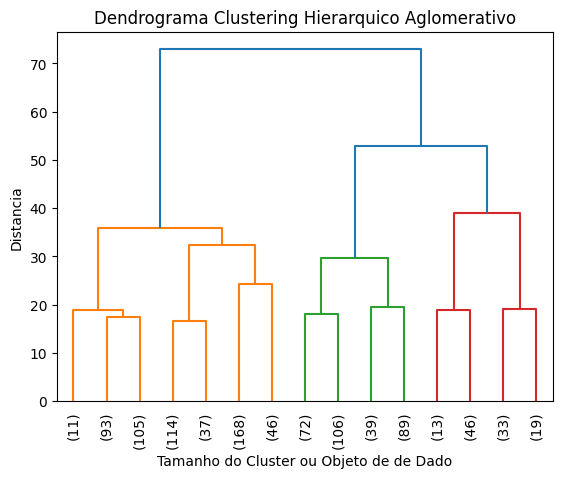

In [92]:
# Mostrar Dendrograma
plt.Figure(figsize=(10, 7))
dendrogram(modelo_de, truncate_mode='lastp', p=15, leaf_rotation=90, leaf_font_size=10)

#plt.axhline(y=32, color='g', linestyle='--')

plt.title('Dendrograma Clustering Hierarquico Aglomerativo')
plt.xlabel('Tamanho do Cluster ou Objeto de de Dado')
plt.ylabel('Distancia')
plt.show()

In [83]:
# Cortar o dendrograma
clusters_scipy = cut_tree(modelo_de, height=32)
len(np.unique(clusters_scipy))

6

In [95]:
px.scatter(df_laptop, x='cluster', y='price', color='brand')

In [98]:
px.scatter(df_laptop, x='cluster', y='rating', color='brand')

In [99]:
# Distribuição da variavel cluster
percentual_cluster = df_laptop.value_counts('cluster') / len(df_laptop) * 100
px.bar(percentual_cluster, color=percentual_cluster.index)

In [100]:
# Distribuição da variavel cluster
qtd_cluster = df_laptop.value_counts('cluster')
px.bar(qtd_cluster, color=qtd_cluster.index)